<a href="https://colab.research.google.com/github/dyou-wbg/meta_processing/blob/main/LighterApproach_NumberOfWordsInTitle_withGroundTruthFlag_deduping_Title.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
# as of today
import datetime as dt
dt.date.today()
import os
import pandas as pd
from google.colab import drive
import csv
import os


Mounted at /content/drive


In [ ]:
import csv
import os
data_dir = '/content/drive/MyDrive/finalMetaFile'
files = os.listdir(data_dir)
files


['metadata_jstor.csv',
 'metadata_scopus 2.csv',
 'elsevier_metadata.csv',
 'metadata_semantic_scholar.csv',
 'url1_ie_table_complete.csv',
 'metadata_econlit.csv',
 '.DS_Store',
 'SSRN_metadata.csv',
 'log.csv',
 'metadata_repec.csv',
 'AEA RCT trials.csv',
 'RCT_title_all.csv',
 'Untitled',
 '3ie_parsed_metadata.csv',
 '3ie_metadata_parsing.ipynb',
 'AEA RCT trials with extracted info.csv']

In [2]:
df_econ = pd.read_csv('/content/drive/MyDrive/finalMetaFile/metadata_econlit.csv')
df_econ.head()


,recordID,pdfLink,plink,shortDbName,journal,pub_date,doi,title,author,abstract,Unnamed: 0.1
0,141,https://content.ebscohost.com/cds/retrieve?con...,https://search.ebscohost.com/login.aspx?direct...,eoh,Capitalism: A Journal of History and Economics,20221201,1969735,Microcosms and Macrocosms: Capitalism and the ...,"Biltoft, C. N.","Using the metaphor of microcosm and macrocosm,...",NaN
1,142,https://content.ebscohost.com/cds/retrieve?con...,https://search.ebscohost.com/login.aspx?direct...,eoh,Central European Journal of Operations Research,20221201,"['2000323', {'@type': 'doi', '#text': '10.1007...",Stochastic Radiotherapy Appointment Scheduling,"['Braune, Roland', 'Gutjahr, Walter J.', 'Vogl...",When scheduling the starting times for treatme...,NaN
2,143,https://content.ebscohost.com/cds/retrieve?con...,https://search.ebscohost.com/login.aspx?direct...,eoh,Central European Journal of Operations Research,20221201,"['2000325', OrderedDict([('@type', 'doi'), ('#...",Examining the Balance between Efficiency and R...,"['de Arquer, Maria', 'Ponte, Borja', 'Pino, Ra...",We study a hybrid system where the demand of c...,NaN
3,144,https://content.ebscohost.com/cds/retrieve?con...,https://search.ebscohost.com/login.aspx?direct...,eoh,Central European Journal of Operations Research,20221201,"['2000326', OrderedDict([('@type', 'doi'), ('#...",The Variable-Width Strip Packing Problem,"['Bodis, Attila', 'Csirik, Janos']","Here, we focus on a generalized version of the...",NaN
4,145,https://content.ebscohost.com/cds/retrieve?con...,https://search.ebscohost.com/login.aspx?direct...,eoh,Central European Journal of Operations Research,20221201,"['2000329', {'@type': 'doi', '#text': '10.1007...",Constrained Naive Bayes with Application to Un...,"['Blanquero, Rafael', 'Carrizosa, Emilio', 'Ra...",The Naive Bayes is a tractable and efficient a...,NaN


In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-3-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:

df_econ['title'] = df_econ['title'].str.replace('"', "'")
df_econ=df_econ[['title']]
df_econ['duplicated_title'] = df_econ.duplicated(subset='title', keep=False)
df_econ['word_count'] = df_econ['title'].apply(lambda x: len(x.split()))

df_econ.head()


<ipython-input-4-bc1149e14449>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ['duplicated_title'] = df_econ.duplicated(subset='title', keep=False)
<ipython-input-4-bc1149e14449>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_econ['word_count'] = df_econ['title'].apply(lambda x: len(x.split()))


,title,duplicated_title,word_count
0,Microcosms and Macrocosms: Capitalism and the Latent Metaphysics of Scale: Foreword,False,11
1,Stochastic Radiotherapy Appointment Scheduling,False,4
2,Examining the Balance between Efficiency and Resilience in Closed-Loop Supply Chains,False,11
3,The Variable-Width Strip Packing Problem,False,5
4,Constrained Naive Bayes with Application to Unbalanced Data Classification,False,9


In [7]:
df_econ['word_count'].nunique()

54

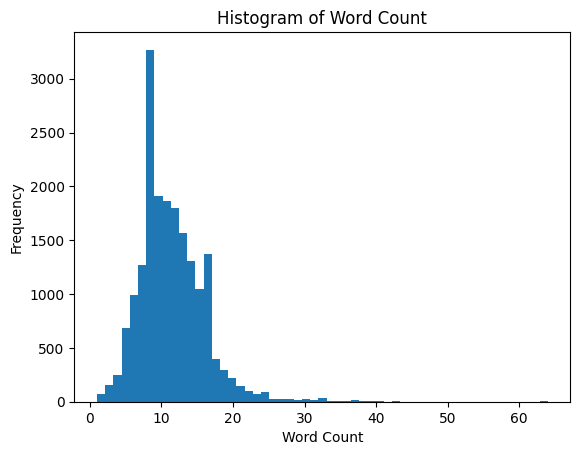

In [8]:
import matplotlib.pyplot as plt

plt.hist(df_econ['word_count'],bins=55)
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Histogram of Word Count')
plt.show()


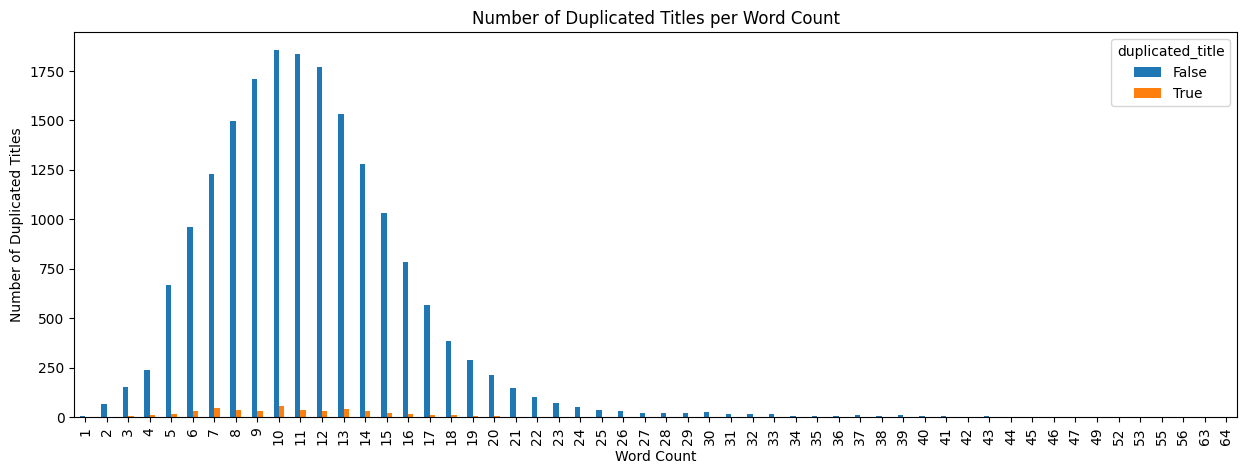

In [12]:


import matplotlib.pyplot as plt
df_econ.groupby('word_count')['duplicated_title'].value_counts().unstack().fillna(0).astype(int).plot(kind='bar', figsize=(15, 5))
plt.xlabel('Word Count')
plt.ylabel('Number of Duplicated Titles')
plt.title('Number of Duplicated Titles per Word Count')
plt.show()


In [14]:

df_econ[df_econ['word_count'] < 5].sort_values(by=['word_count'], ascending=True)['title'].to_frame()


,title
17602,Editorial
1455,Immunity
6609,Brand-Aid
17128,Basis-Momentum
10911,Wealth
7544,Probability Dominance
3383,Security Transitions
3317,Gendered Prices
15967,Republican Homeowning
3125,Apostolic Voting


In [ ]:
df_econ[df_econ['duplicated_title'] == True]


,title,duplicated_title
824,The Inhibitory Effect of Political Conservatism on Consumption: The Case of Fair Trade,True
825,The Inhibitory Effect of Political Conservatism on Consumption: The Case of Fair Trade,True
1202,Free Trade Agreements and World Obesity,True
1211,Revealed Preferences over Risk and Uncertainty,True
1215,Asset Pricing in an Islamic Economy,True
1222,Financial Integration in Asia: A Systemic View on Currency Markets,True
1224,Optimal Dynamic Control of Predator-Prey Models,True
1227,Towards a Vertically Separated Broadband Infrastructure: The Potential Role of Voluntary Separation,True
1228,Modelling Time-Varying Parameters in Panel Data State-Space Frameworks: An Application to the Feldstein-Horioka Puzzle,True
1229,OPTCON3: An Active Learning Control Algorithm for Nonlinear Quadratic Stochastic Problems,True


In [ ]:
df_3ie = pd.read_csv('/content/drive/MyDrive/finalMetaFile/3ie_parsed_metadata.csv')
df_3ie=df_3ie[['title']]
df_3ie['duplicated_title'] = df_3ie.duplicated(subset='title', keep=False)
df_3ie[df_3ie['duplicated_title'] == True].head(10)

,title,duplicated_title
3,smallholder access to weather securities in india demand and impact on production decisions,True
5,the impact of farmer field schools on knowledge and productivity: a study of potato farmers in the peruvian andes,True
29,estimating the impact of agricultural technology on poverty reduction in rural nigeria,True
87,heterogeneous impact of a collective payment for environmental services scheme on reducing deforestation in cambodia,True
124,impact evaluation of the farmer training and development activity in honduras,True
137,alleviating deforestation pressures? impacts of improved stove dissemination on charcoal consumption in urban senegal,True
149,profitability of fertilizer: experimental evidence from female rice farmers in mali,True
168,impact of fadama-ii project on poverty reduction of rural households in nigeria,True
215,subsidies and the persistence of technology adoption: field experimental evidence from mozambique,True
243,heterogeneous impact of a collective payment for environmental services scheme on reducing deforestation in cambodia,True


In [ ]:
index_num = df_3ie[df_3ie['title'] == "smallholder access to weather securities in india demand and impact on production decisions"].index.tolist()
print(index_num)


[3, 2884]


# check against ground-truth (duplicate values within a source)

In [ ]:
import random
from collections import Counter

# Define a function to create shingles from a title
def create_shingles(title, shingle_size=3):
  shingles = set()
  for i in range(len(title) - shingle_size + 1):
    shingle = title[i:i+shingle_size].lower()
    shingles.add(shingle)
  return shingles


In [ ]:
# Define a Minhash function (example: simple modulo operation)
def minhash(shingles, num_hashes):
  min_hashes = []
  for _ in range(num_hashes):
    hash_value = float('inf')
    for shingle in shingles:
      hash_value = min(hash_value, random.randint(0, 1 << 64))
    min_hashes.append(hash_value)
  return min_hashes

In [ ]:
def compare_documents_lsh(doc1_title, doc2_title, shingle_size, num_hashes, num_permutations):
  forest = []
  for _ in range(num_permutations):
    permutation = random.sample(range(len(doc1_title.split())), shingle_size)
    def hash_func(title):
      shingles = create_shingles(" ".join([title.split()[i] for i in permutation]))
      return minhash(shingles, num_hashes)
    forest.append(hash_func)

  query_hashes = forest[0](doc1_title)
  return sum(1 for q, t in zip(query_hashes, forest[0](doc2_title)) if q == t) >= num_hashes // 2


In [ ]:
documents = df_3ie.values.tolist()

In [ ]:
# LSH parameters
shingle_size = 3
num_hashes = 10
num_permutations = 2


In [ ]:
# Evaluate LSH performance
true_positives = 0
false_positives = 0
false_negatives = 0
for doc1, doc2 in zip(documents, documents[1:]):  # Compare each document with subsequent documents
  lsh_result = compare_documents_lsh(df_3ie["title"], df_econ["title"], shingle_size, num_hashes, num_permutations)
  if doc1["ground_truth"] and lsh_result:
    true_positives += 1
  elif doc1["ground_truth"] and not lsh_result:
    false_negatives += 1
  elif not doc1["ground_truth"] and lsh_result:
    false_positives += 1


In [ ]:



# Calculate metrics
recall = true_positives / (true_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print results
print("LSH Model Evaluation:")
print(f"True Positives: {true_positives}")
print(f"False Positives: {false_positives}")
print(f"False Negatives: {false_negatives}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score:.4f}")



# Plan :
Use LSH(Locality-Sensitive Hashin) for initial filtering followed by Min-Hash or contextual embeddings for more nuanced comparisons on potential duplicates identified by LSH. This leverages the strengths of each method for efficiency and accuracy.


# LSH

In [ ]:
print(len(df_3ie),len(df_econ))

11225 19121


In [ ]:
# prepare df

df_econ['title'] = df_econ['title'].str.replace('"', "'")
df_3ie['title'] = df_3ie['title'].str.replace('"', "'")
df_3ie=df_3ie[['title']]
df_econ=df_econ[['title']]
title= pd.concat([df_econ, df_3ie], ignore_index=True)
title

,title
0,Microcosms and Macrocosms: Capitalism and the ...
1,Stochastic Radiotherapy Appointment Scheduling
2,Examining the Balance between Efficiency and R...
3,The Variable-Width Strip Packing Problem
4,Constrained Naive Bayes with Application to Un...
...,...
30341,"the effect of a community-based, integrated an..."
30342,the saqmolo’ project: protocol for a randomize...
30343,effectiveness of structured education and foll...
30344,the roles of nutrition education and food vouc...


In [ ]:
import random
from collections import Counter

# Define a function to create shingles (sets of consecutive words) from a title
def create_shingles(title, shingle_size=3):
  shingles = set()
  for i in range(len(title) - shingle_size + 1):
    shingle = title[i:i+shingle_size].lower()  # Convert to lowercase
    shingles.add(shingle)
  return shingles

In [ ]:
# Define a Min-hash function
def minhash(shingles, num_hashes):
  min_hashes = []
  for _ in range(num_hashes):
    hash_value = float('inf')
    for shingle in shingles:
      hash_value = min(hash_value, random.randint(0, 1 << 64))  # 64-bit hash
    min_hashes.append(hash_value)
  return min_hashes

In [ ]:
# Sample paper titles
titles = [
    "Reinforcement Learning using Augmented Neural Networks",
    "Playing Atari with Deep Reinforcement Learning",
    "Applications of Deep Learning in Natural Language Processing",
    "Convolutional Neural Networks for Image Recognition",
    "A Deep Learning Approach for Protein Structure Prediction"
]
titles

['Reinforcement Learning using Augmented Neural Networks',
 'Playing Atari with Deep Reinforcement Learning',
 'Applications of Deep Learning in Natural Language Processing',
 'Convolutional Neural Networks for Image Recognition',
 'A Deep Learning Approach for Protein Structure Prediction']

In [ ]:
# prompt: what is type of titles

print(type(titles))


<class 'list'>


In [ ]:

titles = title.values.tolist()
titles

[['Microcosms and Macrocosms: Capitalism and the Latent Metaphysics of Scale: Foreword'],
 ['Stochastic Radiotherapy Appointment Scheduling'],
 ['Examining the Balance between Efficiency and Resilience in Closed-Loop Supply Chains'],
 ['The Variable-Width Strip Packing Problem'],
 ['Constrained Naive Bayes with Application to Unbalanced Data Classification'],
 ['New Sports Facilities Do Not Drive Migration between US Cities'],
 ['The Impact of Winter Olympic Games Participation on NHL Attendance'],
 ['Professional Team Sporting Success: Do Economic and Personal Freedom Provide Competitive Advantages?'],
 ['Dynamic Effects of Network Exposure on Equity Markets'],
 ['Systemic Risk and the Financial Network System: An Experimental Investigation'],
 ['Comparing Cryptocurrencies and Gold--A System-GARCH-Approach'],
 ['Does the Impact of Geopolitical Risk Reduce with the Financial Structure of an Economy? A Perspective from Market vs. Bank-Based Emerging Economies'],
 ['Cost Efficiency in Fi

In [ ]:
# Define LSH parameters
shingle_size = 3
num_hashes = 10
num_permutations = 2


In [ ]:
# Create LSH forest
forest = []
for _ in range(num_permutations):
  permutation = random.sample(range(len(titles[0][0].split())), shingle_size)  # Random permutation
  def hash_func(title):
    shingles = create_shingles(" ".join([titles[0][0].split()[i] for i in permutation]))
    return minhash(shingles, num_hashes)
  forest.append(hash_func)

In [ ]:
# Find potential duplicates for a query title
query_title = "Does Economic Policy Uncertainty Matter for Financial Reporting Quality? Evidence from the United States"
query_hashes = forest[0](query_title)  # Apply first hash function


## trial 2

In [ ]:
# trial 2
df_econ['title'] = df_econ['title'].str.replace('"', "'")
df_3ie['title'] = df_3ie['title'].str.replace('"', "'")
df_3ie=df_3ie[['title']]
df_econ=df_econ[['title']]
title= pd.concat([df_econ, df_3ie], ignore_index=True)
title
titles = title.values.tolist()
title1_file=df_econ.values.tolist()
title2_file=df_3ie.values.tolist()
#titles

In [ ]:
import random
from collections import Counter

# Define a function to create shingles from a title
def create_shingles(title, shingle_size=3):
  shingles = set()
  for i in range(len(title) - shingle_size + 1):
    shingle = title[i:i+shingle_size].lower()
    shingles.add(shingle)
  return shingles

# Define a Minhash function
def minhash(shingles, num_hashes):
  min_hashes = []
  for _ in range(num_hashes):
    hash_value = float('inf')
    for shingle in shingles:
      hash_value = min(hash_value, random.randint(0, 1 << 64))
    min_hashes.append(hash_value)
  return min_hashes


In [ ]:
# Combine titles from both files
all_titles = title1_file + title2_file

# Define LSH parameters
shingle_size = 3
num_hashes = 10
num_permutations = 2

In [ ]:
# Create LSH forest
forest = []
for _ in range(num_permutations):
  if type(all_titles[0]) == list:
    all_titles[0] = " ".join(all_titles[0])
  permutation = random.sample(range(len(all_titles[0].split())), shingle_size)  # Random permutation
  def hash_func(title):
    shingles = create_shingles(" ".join([all_titles[0].split()[i] for i in permutation]))
    return minhash(shingles, num_hashes)
  forest.append(hash_func)

In [ ]:
# Find potential duplicates between files (taking too long)
potential_duplicates = []
for title1 in title1_file:
  query_hashes = forest[0](title1)
  for title2 in title2_file:
    # Check for collisions in at least half of the hash functions
    if sum(1 for q, t in zip(query_hashes, forest[0](title2)) if q == t) >= num_hashes // 2:
      potential_duplicates.append((title1, title2))


KeyboardInterrupt: 

In [ ]:
# Print potential duplicates
if potential_duplicates:
  print("Potential Duplicates Between Files:")
  for title1, title2 in potential_duplicates:
    print(f"{title1} (File 1) - {title2} (File 2)")
else:
  print("No potential duplicates found between files.")

# contextual embedding

In [ ]:
import transformers
from sklearn.feature_extraction.text import TfidfVectorizer

# Load pre-trained model and tokenizer
model_name = "bert-base-uncased"
tokenizer = transformers.BertTokenizer.from_pretrained(model_name)
model = transformers.BertModel.from_pretrained(model_name)

# Function to get sentence embedding using pre-trained model
def get_embedding(sentence):
  encoded_input = tokenizer(sentence, return_tensors='pt')
  with torch.no_grad():
    output = model(**encoded_input)
  return output.pooler_output.squeeze(0).numpy()

source_1_titles = title1_file
source_2_titles = title2_file

# Combine titles from both sources
all_titles = source_1_titles + source_2_titles

# Get TF-IDF weights for titles (Optional: Improves embedding quality)
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(all_titles)
tfidf_weights = vectorizer.transform(all_titles).toarray()

# Get sentence embeddings for all titles
embeddings = []
for title, weight in zip(all_titles, tfidf_weights):
  embedding = get_embedding(title) * weight  # Weight titles by TF-IDF
  embeddings.append(embedding)

# Define a function to compare cosine similarity between embeddings
def cosine_similarity(emb1, emb2):
  return np.dot(emb1, emb2) / (np.linalg.norm(emb1) * np.linalg.norm(emb2))

# Find potential duplicates within and between sources
potential_duplicates = []
for i, emb1 in enumerate(embeddings):
  for j, emb2 in enumerate(embeddings):
    if i != j and cosine_similarity(emb1, emb2) > 0.8:  # Threshold for similarity
      title1 = all_titles[i]
      title2 = all_titles[j]
      source1_title = title1 in source_1_titles
      source2_title = title2 in source_2_titles
      potential_duplicates.append((title1, title2, f"Source 1" if source1_title else "Source 2", f"Source 2" if source2_title else "Source 1"))

# Print potential duplicates
if potential_duplicates:
  print("Potential Duplicates:")
  for title1, title2, source1, source2 in potential_duplicates:
    print(f"{title1} ({source1}) - {title2} ({source2})")
else:
  print("No potential duplicates found.")


# Validity

In [ ]:
import random
from collections import Counter

# Define a function to create shingles from a title
def create_shingles(title, shingle_size=3):
  shingles = set()
  for i in range(len(title) - shingle_size + 1):
    shingle = title[i:i+shingle_size].lower()
    shingles.add(shingle)
  return shingles

# Define a Minhash function
def minhash(shingles, num_hashes):
  min_hashes = []
  for _ in range(num_hashes):
    hash_value = float('inf')
    for shingle in shingles:
      hash_value = min(hash_value, random.randint(0, 1 << 64))
    min_hashes.append(hash_value)
  return min_hashes

# Function to check if two titles are duplicates based on ground truth
def is_duplicate(title1, title2, ground_truth):
  return (title1, title2) in ground_truth or (title2, title1) in ground_truth

# Function to evaluate LSH de-duping accuracy
def evaluate_lsh(titles, ground_truth, shingle_size, num_hashes, num_permutations):
  # my LSH model in here
  candidate_duplicates = set()
  # Loop through all titles and find potential duplicates
  for title in titles:
    candidate_duplicates.update(potential_duplicates)

  # Count true positives, false positives, etc.
  true_positives = 0
  false_positives = 0
  for title1, title2 in candidate_duplicates:
    if is_duplicate(title1, title2, ground_truth):
      true_positives += 1
    else:
      false_positives += 1

  # Calculate metrics
  recall = true_positives / len({tuple(t) for t in ground_truth})
  precision = true_positives / (true_positives + false_positives)
  f1_score = 2 * (precision * recall) / (precision + recall)
  false_positive_rate = false_positives / (len(titles) - len(ground_truth))
  true_negative_rate = (len(titles) - true_positives - false_positives) / (len(titles) - len(ground_truth))

  return {
      'true_positives': true_positives,
      'false_positives': false_positives,
      'recall': recall,
      'precision': precision,
      'f1_score': f1_score,
      'false_positive_rate': false_positive_rate,
      'true_negative_rate': true_negative_rate
  }


titles = title

# Ground truth (actually check from sample of ECONLIT and 3IE with 10% sample?)
#ground_truth = { NEED INPUT HERE !! }

# LSH parameters (adjust as needed)
shingle_size = 3
num_hashes = 10
num_permutations = 2

# Evaluate LSH accuracy
results = evaluate_lsh(titles.copy(), ground_truth.copy(), shingle_size, num_hashes, num_permutations)

# Print evaluation results
print("LSH De-duplication Accuracy Evaluation:")
print(f"True Positives: {results['true_positives']}")
print(f"False Positives: {results['false_positives']}")
print(f"Recall: {results['recall']:.4f}")
print(f"Precision: {results['precision']:.4f}")
print(f"F1 Score: {results['f1_score']:.4f}")
print

# LSH gridsearch

In [ ]:
# use scikit-learn's GridSearchCV?
import random
from time import time
from collections import defaultdict

# Define a function to create shingles from a title
def create_shingles(title, shingle_size=3):
  shingles = set()
  for i in range(len(title) - shingle_size + 1):
    shingle = title[i:i+shingle_size].lower()
    shingles.add(shingle)
  return shingles

# Define a Minhash function (example: simple modulo operation)
def minhash(shingles, num_hashes):
  min_hashes = []
  for _ in range(num_hashes):
    hash_value = float('inf')
    for shingle in shingles:
      hash_value = min(hash_value, random.randint(0, 1 << 64))
    min_hashes.append(hash_value)
  return min_hashes

# Function to benchmark LSH processing time for a single parameter set
def benchmark_lsh(titles, shingle_size, num_hashes, num_permutations):
  start_time = time()
  # LSH model here
  elapsed_time = time() - start_time
  return elapsed_time


titles = title

# Define parameter grid for grid search
param_grid = {
  'shingle_size': [3, 5],
  'num_hashes': [5, 10],
  'num_permutations': [1, 2]
}

# Perform grid search
best_params = None
min_time = float('inf')
results = defaultdict(list)
for params in GridSearchCV(param_grid=param_grid):
  shingle_size, num_hashes, num_permutations = params
  elapsed_time = benchmark_lsh(titles.copy(), shingle_size, num_hashes, num_permutations)
  results[f'shingle_size={shingle_size}, num_hashes={num_hashes}, num_permutations={num_permutations}'].append(elapsed_time)
  if elapsed_time < min_time:
    min_time = elapsed_time
    best_params = params

# Print results
print("LSH Processing Time Evaluation:")
print("Grid Search Parameters:", param_grid)
if best_params:
  print("Best Parameters:", best_params)
  print("Minimum Time:", min_time, "seconds")
else:
  print("No valid configuration found.")
for param_set, times in results.items():
  print(f"{param_set}: Average Time - {sum(times) / len(times):.4f} seconds")